# 1.importing the libraries

In [1]:
import pandas as pd

# 2.importing the dataset

In [2]:
data = pd.read_csv('heart.csv')

# 3 .taking care of missing values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. taking care of duplicate values

In [4]:
data_dup = data.duplicated ().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

# 5.data processing

In [9]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()  <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6.encoding categorial data  

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
pd.get_dummies(data,columns=cate_val,drop_first=True)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#  7.feature scaling

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
from sklearn.preprocessing  import StandardScaler

In [18]:
st = StandardScaler()

In [19]:
data[cont_val] = st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


# 8.splitting the dataset into the training set and test set 

In [21]:
x = data.drop('target',axis=1)

In [22]:
y = data['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train_,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [26]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

#  9.logistic regression

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [28]:
 from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [33]:
y_test_encoded_2d = y_test_encoded.reshape(-1, 1)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

#  10.svm

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [39]:
svm.fit(x_train,y_train)

SVC()

In [40]:
y_pred2 = svm.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

# 11. kneighbors classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred3=knn.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [48]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)

In [49]:
score

[]

In [51]:
score.append(accuracy_score(y_test,y_pred))

In [52]:
score

[0.7868852459016393]

In [54]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

#  non-linear ml algorithms

In [55]:
data = pd.read_csv('heart.csv')

In [56]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [57]:
data = data.drop_duplicates()

In [58]:
data.shape

(302, 14)

In [59]:
x = data.drop('target',axis=1)
y=data['target']

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

#  12.decision tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier() 

In [63]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred4= dt.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

# 13. random forest classifier 

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred5= rf.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

#  14.gradient boosting classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc = GradientBoostingClassifier()

In [73]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred6 = gbc.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [97]:
import pandas as pd

final_data = pd.DataFrame({'Models': ['SVM', 'KNN', 'DT', 'RF', 'GB'],
                          'ACC':[accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [94]:
final_data

,Models,ACC
0,SVM,0.836066
1,KNN,0.737705
2,DT,0.754098
3,RF,0.836066
4,GB,0.803279


In [98]:
import seaborn as sns

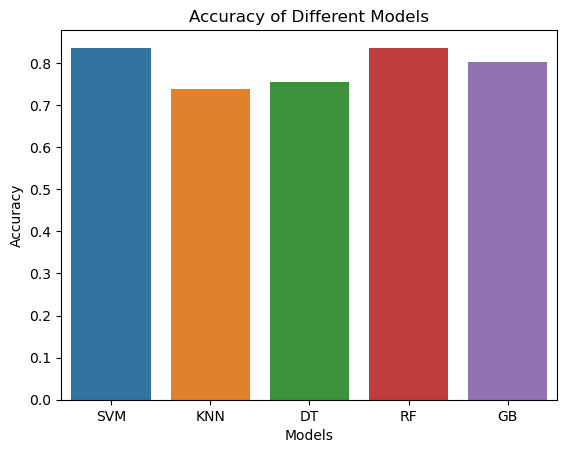

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

In [102]:
x = data.drop('target',axis=1)
y=data['target']

In [103]:
x.shape

(302, 13)

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

# 15.prediction on new data

In [106]:
import pandas as pd

In [107]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [108]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [110]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


#  16.save model using joblib

In [111]:
import joblib

In [112]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [113]:
model = joblib.load('model_joblib_heart')

In [114]:
model.predict(new_data)

array([0], dtype=int64)

# 17.gui 

In [115]:
from tkinter import *
import joblib

In [122]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [132]:
def predict_risk(age, gender, cholesterol, blood_pressure, chest_pain, fasting_blood_sugar, trestbps, cardiac_arrest, thal):
    # Perform necessary preprocessing on input values
    input_data = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'cholesterol': [cholesterol],
        'blood_pressure': [blood_pressure],
        'chest_pain': [cp],
        'fating_blood_sugar': [fbs],
        'trestbps': [trestbps],
        'cardiac_arrest': [ca],
        'thal': [thal],
    })

    # Make predictions
    # predicted_risk = model.predict(input_data)
    predicted_risk = 1  # Placeholder for actual prediction

    return predicted_risk

def on_predict():
    age_val = int(age_entry.get())
    gender_val = gender_combobox.get()
    cholesterol_val = int(cholesterol_entry.get())
    bp_val = int(blood_pressure_entry.get())
    cp_val = int(chest_pain_entry.get())
    fbs_val = int(fasting_blood_sugar_entry.get())
    trestbps_val = int(trestbps_entry.get())
    ca_val = int(cardiac_arrest_entry.get())
    thal_val = int(thal_entry.get())
    predicted_risk = predict_risk(age_val, gender_val, cholesterol_val, bp_val, cp_val, fbs_val, trestbps_val, ca_val, thal_val)
    result_label.config(text=f'Predicted Risk: {predicted_risk}')

# Create the main window
window = tk.Tk()
window.title('Cardiovascular Risk Prediction')

# Create GUI components
age_label = ttk.Label(window, text='Age:')
age_entry = ttk.Entry(window)

gender_label = ttk.Label(window, text='Gender:')
gender_combobox = ttk.Combobox(window, values=['Male', 'Female'])

cholesterol_label = ttk.Label(window, text='Cholesterol:')
cholesterol_entry = ttk.Entry(window)

blood_pressure_label = ttk.Label(window, text='Blood Pressure:')
blood_pressure_entry = ttk.Entry(window)

chest_pain_label = ttk.Label(window, text='Chest Pain:')
chest_pain_entry = ttk.Entry(window)

fasting_blood_sugar_label = ttk.Label(window, text='Fasting Blood Sugar:')
fasting_blood_sugar_entry = ttk.Entry(window)

trestbps_label = ttk.Label(window, text='trestbps:')
trestbps_entry = ttk.Entry(window)

cardiac_arrest_label = ttk.Label(window, text='Cardiac Arrest:')
cardiac_arrest_entry = ttk.Entry(window)

thal_label = ttk.Label(window, text='thal:')
thal_entry = ttk.Entry(window)

predict_button = ttk.Button(window, text='Predict', command=on_predict)
result_label = ttk.Label(window, text='Predicted Risk:')

# Arrange GUI components using grid layout
age_label.grid(row=0, column=0, padx=5, pady=5)
age_entry.grid(row=0, column=1, padx=5, pady=5)
gender_label.grid(row=1, column=0, padx=5, pady=5)
gender_combobox.grid(row=1, column=1, padx=5, pady=5)
cholesterol_label.grid(row=2, column=0, padx=5, pady=5)
cholesterol_entry.grid(row=2, column=1, padx=5, pady=5)
blood_pressure_label.grid(row=3, column=0, padx=5, pady=5)
blood_pressure_entry.grid(row=3, column=1, padx=5, pady=5)
chest_pain_label.grid(row=4, column=0, padx=5, pady=5)
chest_pain_entry.grid(row=4, column=1, padx=5, pady=5)
fasting_blood_sugar_label.grid(row=5, column=0, padx=5, pady=5)
fasting_blood_sugar_entry.grid(row=5, column=1, padx=5, pady=5)
trestbps_label.grid(row=6, column=0, padx=5, pady=5)
trestbps_entry.grid(row=6, column=1, padx=5, pady=5)
cardiac_arrest_label.grid(row=7, column=0, padx=5, pady=5)
cardiac_arrest_entry.grid(row=7, column=1, padx=5, pady=5)
thal_label.grid(row=8, column=0, padx=5, pady=5)
thal_entry.grid(row=8, column=1, padx=5, pady=5)
predict_button.grid(row=9, column=0, columnspan=2, padx=5, pady=5)
result_label.grid(row=10, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()